In [35]:
# STEP 1: Install necessary libraries
!pip install tensorflow pillow matplotlib


In [36]:
# STEP 2: Import required packages
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO


In [37]:
# STEP 3: Load pre-trained CNN (InceptionV3) for feature extraction
base_model = InceptionV3(weights='imagenet')
cnn_model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)


In [38]:
# STEP 4: Download image from internet (cat playing in water)
image_url = "https://cdn.pixabay.com/photo/2023/09/14/14/49/cat-8252733_960_720.jpg"

response = requests.get(image_url)
try:
    img = Image.open(BytesIO(response.content)).convert('RGB')
    img_resized = img.resize((299, 299))  # Resize for InceptionV3
except Image.UnidentifiedImageError:
    print(f"Error: Could not identify image from URL: {image_url}")
    # Handle the error, perhaps by trying a different image or displaying an error message
    img_resized = None # Set to None to indicate failure

if img_resized:
    plt.imshow(img_resized)
    plt.axis('off')
    plt.show()

Error: Could not identify image from URL: https://cdn.pixabay.com/photo/2023/09/14/14/49/cat-8252733_960_720.jpg


In [39]:
from diffusers import StableDiffusionPipeline
import torch

# Define the text description
text_description = "a cat playing in water"

# Load a pre-trained diffusion model
# Using a smaller model for faster generation
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda") # Move model to GPU if available

# Generate the image
generated_image = pipe(text_description).images[0]

# Store the generated image in a variable
# The image is already stored in the 'generated_image' variable

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [40]:
from PIL import ImageDraw, ImageFont

In [41]:
# Define the text description (same as used for initial generation)
text_description = "a cat playing in water"

# Regenerate the image to ensure a clean canvas
# This part is duplicated from cell 491eb423 to get a fresh image
from diffusers import StableDiffusionPipeline
import torch

# Load a pre-trained diffusion model (using a smaller model for faster generation)
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda") # Move model to GPU if available

# Generate the image
generated_image = pipe(text_description).images[0]


# Define the caption text
caption_text = "Cat Stares the rat" # Changed caption text

# Create a drawing context on the fresh image
draw = ImageDraw.Draw(generated_image)

# Choose a font and font size
try:
    # Try to load 'arial.ttf'
    font = ImageFont.truetype("arial.ttf", 100) # Increased font size
except IOError:
    try:
        # If 'arial.ttf' is not found, try 'DejaVuSans-Bold'
        font = ImageFont.truetype("DejaVuSans-Bold", 100) # Increased font size
    except IOError:
        # If neither font is found, use a default PIL font
        font = ImageFont.load_default()
        print("Neither arial.ttf nor DejaVuSans-Bold font found, using default font.")
        # Note: Default font has a fixed size and might not scale as expected.


# Determine the position for the caption (top center)
image_width, image_height = generated_image.size

# Get the bounding box of the text
# For default font, textsize is used instead of textbbox
if font == ImageFont.load_default():
    text_width, text_height = draw.textsize(caption_text, font=font)
else:
    text_bbox = draw.textbbox((0, 0), caption_text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]


# Calculate position to center the text at the top
x = (image_width - text_width) // 2
y = 20 # 20 pixels from the top

# Draw the caption text onto the image with a visible color (black)
draw.text((x, y), caption_text, fill="black", font=font)

# The modified image with the caption is now in the 'generated_image' variable

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Neither arial.ttf nor DejaVuSans-Bold font found, using default font.


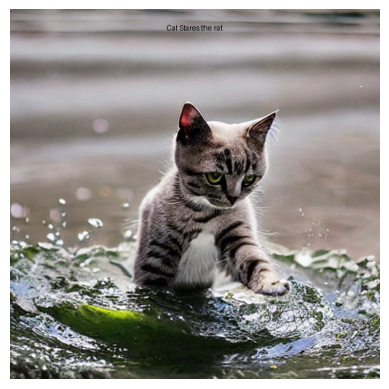

In [42]:
plt.imshow(generated_image)
plt.axis('off')
plt.show()